In [1]:
# Example usage of windaq.py to import data from DI-2108
# This file is recorded as 16bit HiRez, test hirez import functionality

# Import the library, if file is not within the same directory as your script use sys.path.append()
import windaq as wdq

# Path to sample windaq file, this is one of the sample files provided by Dataq when Windaq Waveform Browser is installed
f = 'DI-2108_sine_sample.WDH'

# Open file
wfile = wdq.windaq(f)

In [2]:
# Get the first channel of data
ch1 = wfile.data(1)      # channel indexing starts at 1
for d in ch1[0:10]:
    print(d)

-4.40765380859375
-4.25384521484375
-4.083251953125
-3.8970947265625
-3.69537353515625
-3.47900390625
-3.24859619140625
-3.00537109375
-2.7496337890625
-2.4835205078125


In [3]:
# Get the relative time
tdata = wfile.time()
for t in tdata[0:10]:
    print(t)

0.0
0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001


In [4]:
# Get channel 1 user annotation
print(wfile.chAnnotation(1))
# Get channel 1 units
print(wfile.unit(1))

Sample
Volt  


In [5]:
# Read all data into a pandas Dataframe, this is my preferred way of working with data
import pandas as pd
df = pd.DataFrame({'time':               wfile.time(),
                   'sine':         wfile.data(1)})

print(df.head())

    time      sine
0  0.000 -4.407654
1  0.001 -4.253845
2  0.002 -4.083252
3  0.003 -3.897095
4  0.004 -3.695374


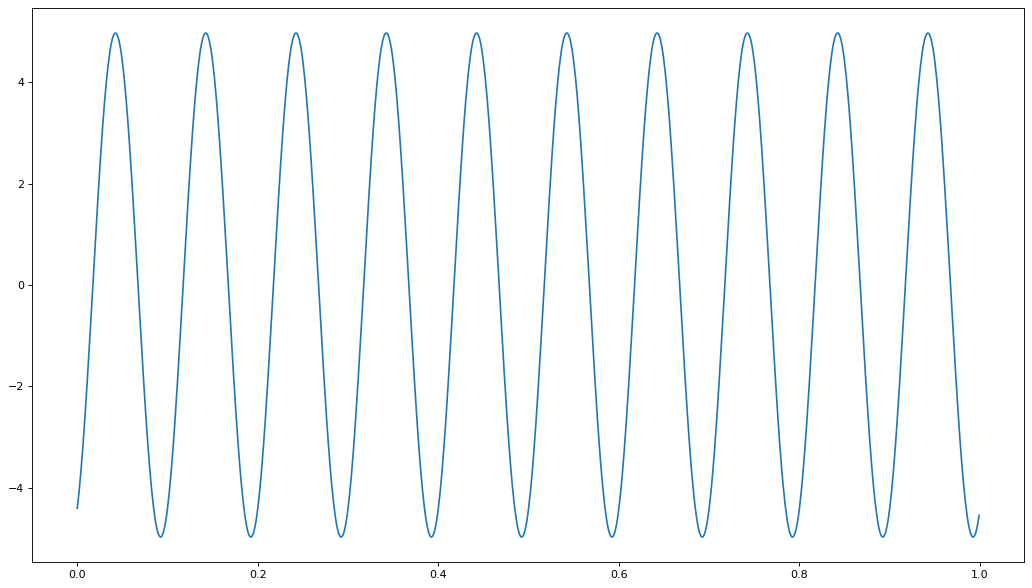

In [6]:
# Lets Plot it to make sure it looks like what Windaq Waveform Browser Shows
import matplotlib.pyplot as plt
fig = plt.figure(num=1, figsize=(16,9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df['time'], df['sine'], label='sine')
plt.show()